In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.io import fits as fits
import healpy as hp
import pysm 
from pysm.nominal import models
from pysm.common import convert_units
import camb
from camb import model, initialpower

from numpy import linalg as LA

import utils

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


## alm_00 and mean 

$a_{00} =\sqrt{4\pi} \bar{T}$

In [72]:
a = np.ones(12*512*512)

In [73]:
hp.map2alm(a)

array([ 3.54490766e+00+0.j, -1.32659027e-17+0.j, -9.30338835e-08+0.j, ...,
        0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j])

In [75]:
np.mean(a)*np.sqrt(4*np.pi)

3.5449077018110318

In [66]:
ones = np.arange(12*1024**2)

In [14]:
hp.anafast(ones)[0]

497407259953750.7

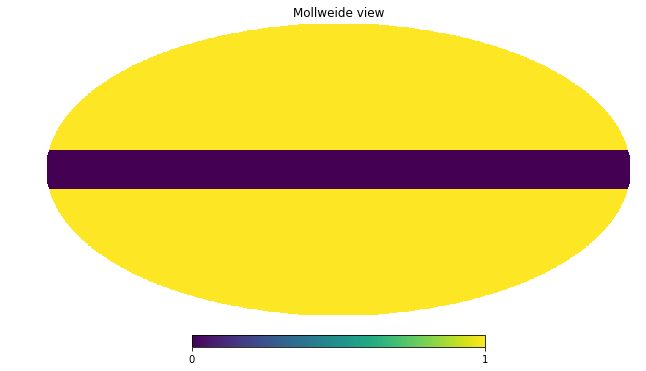

In [41]:
nside = 512
mask_none = np.arange(hp.nside2npix(nside))
l_deg_min = 80; l_deg_max = 100;  # latitude
my_mask = (np.radians(l_deg_max) < hp.pix2ang(nside, mask_none)[0] ) + (hp.pix2ang(nside, mask_none)[0] < np.radians(l_deg_min))
hp.mollview(my_mask)

In [6]:
ali_ma = hp.read_map('/smc/jianyao/Ali_maps/ali_mask_wo_edge.fits')

NSIDE = 1024
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [83]:
fsky = 1- sum(ali_ma)/(12.0*1024**2)

In [87]:
cl_ma[0]*(fsky)**2/(1-fsky)**2

9.90811004196461

In [88]:
cl_rever[0]

9.908107345573118

(0.01, 14)

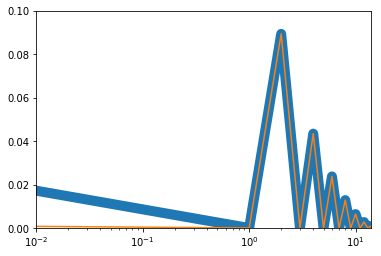

In [52]:
plt.plot(cl_new, lw = 10)
plt.plot(cl_new_re)
plt.xscale('log')
plt.ylim(0, 0.1)
plt.xlim(0.01,14)

## mean and std

In [ ]:
total = np.loadtxt('./cls_r_0p05.txt')

lmax = 2000; Q = 50 #lmax + 1
cl_all_E = np.zeros((SamNum, Q)); cl_all_B = np.zeros((SamNum, Q))
#cl_all_E_l2 = np.zeros((SamNum, Q)); cl_all_B_l2 = np.zeros((SamNum, Q))

for i in range(SamNum):
    cmb_i =  hp.synfast(total, nside = 1024, verbose = False, new = True)
    alms_i = hp.map2alm(utils.Mask(cmb_i))
    alms_i[2] *= 10
    cls_i = hp.alm2cl(alms_i)
#     hp.write_map('/smc/jianyao/Ali_maps/cmb_0.05_realizations/cmb_IQU_%s.fits'%(i), cmb_i)
#     cls_i = hp.anafast(Mask(cmb_i), lmax = lmax, nspec = 3) ## sky with ali_mask
    cl_all_E[i] = utils.bin_l(cls_i[1], lmax, Q) ## EE cls_i[1] #
    cl_all_B[i] = utils.bin_l(cls_i[2], lmax, Q) ## BB cls_i[2] #

In [ ]:
cl_mean_E = np.mean(cl_all_E, axis = 0)
cl_mean_B = np.mean(cl_all_B, axis = 0)

cl_std_E = np.std(cl_all_E, axis = 0)
cl_std_B = np.std(cl_all_B, axis = 0)

In [ ]:
lcl = utils.get_ell(2000, Q)
l2 = utils.l2(lcl)

plt.loglog(lcl, l2*cl_mean_E*np.sqrt(2.0/((2*lcl+1)*fsky*2000/Q)), label = 'mean-std-E')
plt.loglog(lcl, l2*cl_mean_B*np.sqrt(2.0/((2*lcl+1)*fsky*2000/Q)), label = 'mean-std-B')

plt.loglog(lcl, l2*cl_std_E, label = 'std_E')
plt.loglog(lcl, l2*cl_std_B, label = 'std_B')

# plt.loglog(lcl, cl_std_B_l2, label = 'std_B_l2')
# plt.loglog(lcl, cl_std_E_l2, label = 'std_E_l2')

plt.legend(fontsize = 15)
plt.title('$C_{\ell}$ E, B with $\Delta \ell$ = 40')
# plt.savefig('/home/jianyao/Ali_maps/results/1220/cmb_e_100*b_masked_sky.jpg', format = 'jpg')